In [1]:
from skimage.io import imread, imshow

In [2]:
binary = imread('blobs_binary.tif')

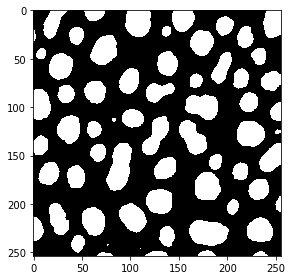

In [3]:
imshow(binary)

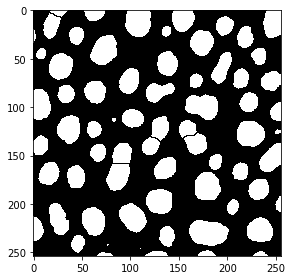

In [4]:
imagej_binary_watershed = imread('blobs_binary_watershed.tif')
imshow(imagej_binary_watershed)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from skimage.filters import gaussian
from skimage.filters import sobel
from skimage.morphology import binary_opening

def binary_watershed(binary, sigma:float=3.5):
    # typical way of using scikit-image watershed
    distance = ndi.distance_transform_edt(binary)
    blurred_distance = gaussian(distance, sigma=3.5)
    coords = peak_local_max(blurred_distance, footprint=np.ones((3, 3)), labels=binary)
    mask = np.zeros(distance.shape, dtype=bool)
    mask[tuple(coords.T)] = True
    markers, _ = ndi.label(mask)
    labels = watershed(-blurred_distance, markers, mask=binary)

    # identify label-cutting edges
    edges = sobel(labels)
    edges2 = sobel(binary)
    almost = np.logical_not(np.logical_xor(edges != 0, edges2 != 0)) * binary
    return binary_opening(almost)

C:\Users\rober\miniconda3\envs\bio1\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


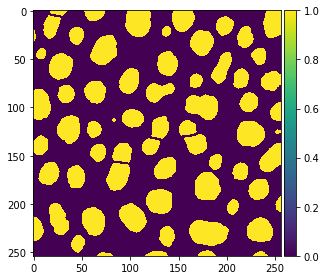

In [6]:
skimage_binary_watershed = binary_watershed(binary)

imshow(binary_watershed(binary) * 1)

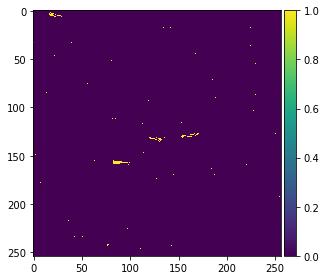

In [7]:
imshow((skimage_binary_watershed != (imagej_binary_watershed != 0)) * 1)